In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



C:\Users\Race12\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
#importing file 

df=pd.read_csv("winequality-white.csv",sep=';')

In [3]:
df.shape
df.size
df.head()
df.tail()

(4898, 12)

58776

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [4]:
#check for missing value 
pd.isnull(df).any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [5]:
pd.isnull(df).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
# find out thge number whose churn vs none
print("Counts of label")
df.groupby("quality").size()

Counts of label


quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64

##Create categorical binning fron wine quality

In [9]:
bins=(2,5,6,9)
names=[1,2,3]
df['quality_type']=pd.cut(df['quality'],bins=bins,labels=names)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
quality_type            4898 non-null category
dtypes: category(1), float64(11), int64(1)
memory usage: 464.2 KB


In [11]:
df.groupby("quality_type").size()

quality_type
1    1640
2    2198
3    1060
dtype: int64

Convert Pandas categorical to pandas numercal

In [12]:
df['quality_type']=pd.to_numeric(df['quality_type'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
quality_type            4898 non-null int64
dtypes: float64(11), int64(2)
memory usage: 497.5 KB


##Genaret pandas profiling

In [14]:
eda_report = pandas_profiling.ProfileReport(df)
eda_report.to_file("winequality-white.html")

In [15]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_type
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663,-0.103154
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723,-0.182924
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209,-0.020301
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577,-0.125506
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934,-0.221316
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158,-0.013977
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737,-0.201185
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123,-0.332495
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427,0.106422
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678,0.060027


In [16]:
X=df.drop(['quality','quality_type'],axis=1,inplace=False)

In [17]:
y=df['quality_type']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)

In [19]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(3673, 11)

(1225, 11)

(3673,)

(1225,)

In [20]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [44]:
clf = tree.DecisionTreeClassifier(max_depth=4)
                               

In [45]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [46]:
clf=clf.fit(X_train,y_train)

In [47]:
y_pred=clf.predict(X_test)

In [48]:
print("Model Accuracy")
metrics.accuracy_score(y_test,y_pred)
print("Classification Report")
metrics.classification_report(y_test,y_pred,labels=None, target_names=None, sample_weight=None, digits=2)

Model Accuracy


0.56734693877551023

Classification Report


'             precision    recall  f1-score   support\n\n          1       0.65      0.53      0.59       404\n          2       0.56      0.63      0.59       574\n          3       0.47      0.47      0.47       247\n\navg / total       0.57      0.57      0.57      1225\n'

Confisusion Matrix


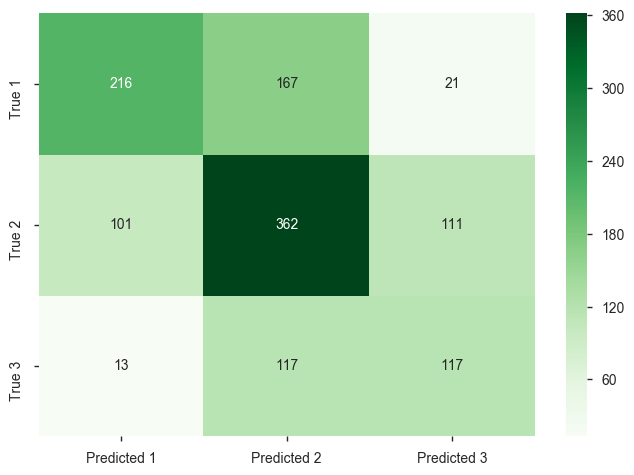

In [49]:
#Confusion Matrix
print("Confisusion Matrix")
cf=metrics.confusion_matrix(y_test,y_pred)
lbl1=["Predicted 1","Predicted 2","Predicted 3"]
lbl2=["True 1","True 2","True 3"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt='d',xticklabels=lbl1,yticklabels=lbl2)
plt.show();

In [27]:
n_estimaters=[10,500,1000,2000]
criterian=['gini','entropy']
min_samples_split=[2,10,20,50,100]
max_depth=[20,30,40,50,None]

In [28]:
params_grid = {'max_leaf_nodes': list(range(2, 100)),
          'min_samples_split': min_samples_split,
          'min_samples_leaf': list(range(2, 20)),
               'max_depth':max_depth,
          'criterion':criterian}
#params_grid ={''criterion'': criterian,'criterion':}

In [29]:
clf.get_params().keys()


dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [30]:
grid_search_cv = GridSearchCV(tree.DecisionTreeClassifier(random_state=123), params_grid, n_jobs=-1, verbose=1)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 88200 candidates, totalling 264600 fits


[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 9874 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 26374 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 49474 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 79174 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 115474 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 152599 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 177349 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 205399 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 236749 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 264600 out of 264600 | elapsed: 13.5min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 7... 13, 14, 15, 16, 17, 18, 19], 'max_depth': [20, 30, 40, 50, None], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [35]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=87, min_impurity_split=1e-07,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [36]:
grid_search_cv.best_score_

0.59134222706234685

In [37]:
grid_search_cv.best_index_

7651

In [38]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.57877551020408158

In [61]:
cv=pd.DataFrame(grid_search_cv.cv_results_)

In [63]:
cv.to_csv("result.csv")


Features Importance

In [50]:
clf.feature_importances_

array([ 0.04317059,  0.23150612,  0.        ,  0.02876963,  0.        ,
        0.07965814,  0.        ,  0.        ,  0.01982419,  0.01531698,
        0.58175434])

In [56]:

features=pd.DataFrame(clf.feature_importances_,X.columns)

In [52]:
features

,0
fixed acidity,0.043171
volatile acidity,0.231506
citric acid,0.000000
residual sugar,0.028770
chlorides,0.000000
free sulfur dioxide,0.079658
total sulfur dioxide,0.000000
density,0.000000
pH,0.019824
sulphates,0.015317


In [43]:
features.columns=["Importance"]
features

,Importance
fixed acidity,0.032972
volatile acidity,0.225229
citric acid,0.000000
residual sugar,0.000000
chlorides,0.000000
free sulfur dioxide,0.062412
total sulfur dioxide,0.000000
density,0.000000
pH,0.023919
sulphates,0.000000


In [58]:
export_graphviz(clf,
                out_file="tree_wine.dot",
                feature_names=X.columns,
                rounded=True,
                filled=True)